# **Producto Integrador de Aprendizaje**

# **Inteligencia Artificial Martes N4**

#**Modelo 3**

*   1860133 Luis Carlos Garza Baena
*   1724138 Luis Alejandro Ordoñez Domenech   
*   1943575 Rommel Emiliano Reyes Equihua     
*   1811439 Daniel Efraín Velázquez Villa     

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers import PReLU
from keras.initializers import Constant

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

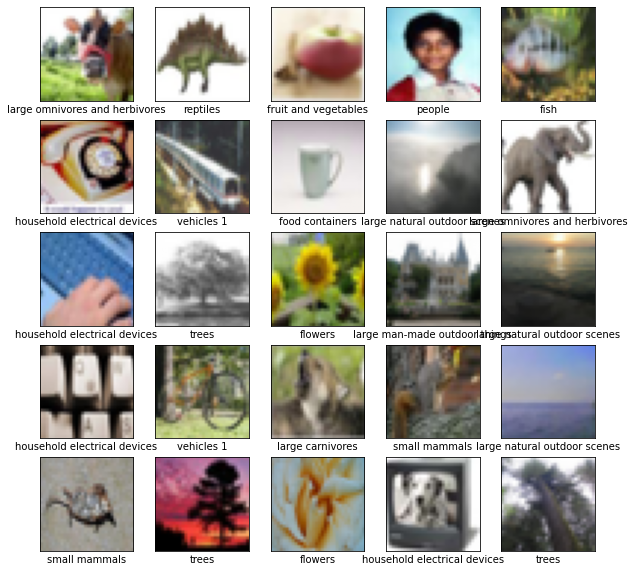

In [ ]:
class_names = ['aquatic mammals','fish','flowers','food containers','fruit and vegetables',
               'household electrical devices','household furniture','insects',
               'large carnivores','large man-made outdoor things','large natural outdoor scenes',
               'large omnivores and herbivores','medium-sized mammals','non-insects invertebrates',
               'people','reptiles','small mammals','trees','vehicles 1','vehicles 2'] 

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), input_shape=(32, 32, 3)))
model.add(PReLU(alpha_initializer=Constant(value=0.3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 2)))
model.add(PReLU(alpha_initializer=Constant(value=0.3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(192, (3, 3)))
model.add(PReLU(alpha_initializer=Constant(value=0.3)))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))
model.add(layers.Dense(20))

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 p_re_lu_14 (PReLU)          (None, 30, 30, 64)        57600     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 128)       32896     
                                                                 
 p_re_lu_15 (PReLU)          (None, 14, 14, 128)       25088     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                

In [ ]:
model.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 222s 141ms/step - loss: 2.1261 - accuracy: 0.3456 - val_loss: 1.9302 - val_accuracy: 0.4079
Epoch 2/10
1563/1563 [==============================] - 219s 140ms/step - loss: 1.6370 - accuracy: 0.4895 - val_loss: 1.6070 - val_accuracy: 0.4995
Epoch 3/10
1563/1563 [==============================] - 222s 142ms/step - loss: 1.3855 - accuracy: 0.5648 - val_loss: 1.5439 - val_accuracy: 0.5279
Epoch 4/10
1563/1563 [==============================] - 218s 140ms/step - loss: 1.1682 - accuracy: 0.6290 - val_loss: 1.4614 - val_accuracy: 0.5512
Epoch 5/10
1563/1563 [==============================] - 221s 141ms/step - loss: 0.9630 - accuracy: 0.6907 - val_loss: 1.4461 - val_accuracy: 0.5751
Epoch 6/10
1563/1563 [==============================] - 221s 141ms/step - loss: 0.7611 - accuracy: 0.7522 - val_loss: 1.6500 - val_accuracy: 0.5540
Epoch 7/10
1563/1563 [==============================] - 221s 141ms/step - loss: 0.5726 - accuracy: 0.8116 - val_

313/313 - 10s - loss: 2.3698 - accuracy: 0.5540 - 10s/epoch - 32ms/step


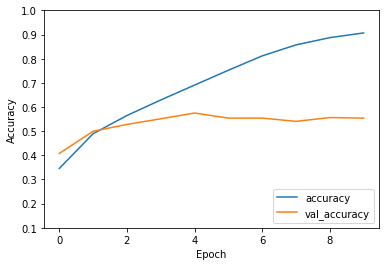

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)